In [29]:
import os
os.chdir('C:/Users/박순혁/Desktop/class/2020-1/grad')
import pandas as pd
#1~9호선 전체역별 모델을 제작하고자 하였으나 지하철 승하차 데이터에 전체역이 나와있지 않아 2019년 5월 기준 가장 많은 승하차 인원 top4와
#추가적으로 서울의 대표적 나들이 장소와 가까운 역 4군데를 선정하였다. 이태원 같은 경우는 코로나 확진으로 많은 피해를 받는 구이기 때문에
#포함시켜보았다.
import seaborn as sns
import matplotlib
import matplotlib.dates as md
import matplotlib.pyplot as plt
from datetime import datetime
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from sklearn.preprocessing import *
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.linear_model import LogisticRegression

In [2]:
#한글
import platform

from matplotlib import font_manager, rc
import matplotlib.pyplot as plt

plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

In [3]:
#2020년 5월 승하차 데이터
df_2005 = pd.read_csv('CARD_SUBWAY_MONTH_202005.csv',encoding='CP949')
df_2005 = df_2005[df_2005['역명'].isin(['강남','잠실(송파구청)','홍대입구','고속터미널','이태원','여의나루','건대입구','명동'])]
df_2005 = df_2005[df_2005['사용일자'] >= 20200501]
df_2005 = df_2005[df_2005['호선명'].isin(['2호선','3호선','4호선','5호선','6호선'])]
df_2005 = df_2005.rename(columns={'호선명':'노선명'})
#2020년 4월 승하차 데이터
df_2004 = pd.read_csv('CARD_SUBWAY_MONTH_202004.csv')
df_2004 = df_2004[df_2004['역명'].isin(['강남','잠실(송파구청)','홍대입구','고속터미널','이태원','여의나루','건대입구','명동'])]
df_2004 = df_2004[df_2004['노선명'].isin(['2호선','3호선','4호선','5호선','6호선'])]
df_2004 = df_2004.drop(['역ID','등록일자'], axis=1)
#2020년 3월 승하차 데이터
df_2003 = pd.read_csv('CARD_SUBWAY_MONTH_202003.csv')
df_2003 = df_2003[df_2003['역명'].isin(['강남','잠실(송파구청)','홍대입구','고속터미널','이태원','여의나루','건대입구','명동'])]
df_2003 = df_2003[df_2003['노선명'].isin(['2호선','3호선','4호선','5호선','6호선'])]
df_2003 = df_2003.drop(['역ID','등록일자'], axis=1)
#2020년 2월 승하차 데이터
df_2002 = pd.read_csv('CARD_SUBWAY_MONTH_202002.csv')
df_2002 = df_2002[df_2002['역명'].isin(['강남','잠실(송파구청)','홍대입구','고속터미널','이태원','여의나루','건대입구','명동'])]
df_2002 = df_2002[df_2002['노선명'].isin(['2호선','3호선','4호선','5호선','6호선'])]
df_2002 = df_2002.drop(['역ID','등록일자'], axis=1)
#2020년 1월 승하차 데이터    * 1월 15일 우한에서 코로나바이러스 확산 시작
df_2001 = pd.read_excel('CARD_SUBWAY_MONTH_202001_1.xlsx')
df_2001 = df_2001[df_2001['역명'].isin(['강남','잠실(송파구청)','홍대입구','고속터미널','이태원','여의나루','건대입구','명동'])]
df_2001 = df_2001[df_2001['노선명'].isin(['2호선','3호선','4호선','5호선','6호선'])]
df_2001 = df_2001.drop(['역ID','등록일자'], axis=1)
#2019년 12월 승하차 데이터
df_1912 = pd.read_csv('CARD_SUBWAY_MONTH_201912.csv',encoding='CP949')
df_1912 = df_1912[df_1912['역명'].isin(['강남','잠실(송파구청)','홍대입구','고속터미널','이태원','여의나루','건대입구','명동'])]
df_1912 = df_1912[df_1912['노선명'].isin(['2호선','3호선','4호선','5호선','6호선'])]
df_1912 = df_1912.drop(['역ID','등록일자'], axis=1)
#2019년 11월 승하차 데이터
df_1911 = pd.read_csv('CARD_SUBWAY_MONTH_201911.csv',encoding='CP949')
df_1911 = df_1911[df_1911['역명'].isin(['강남','잠실(송파구청)','홍대입구','고속터미널','이태원','여의나루','건대입구','명동'])]
df_1911 = df_1911[df_1911['호선명'].isin(['2호선','3호선','4호선','5호선','6호선'])]
df_1911 = df_1911.drop(['역ID','등록일자'], axis=1)
df_1911 = df_1911.rename(columns={'호선명':'노선명'})
#2019년 10월 승하차 데이터
df_1910 = pd.read_csv('CARD_SUBWAY_MONTH_201910.csv')
df_1910 = df_1910[df_1910['역명'].isin(['강남','잠실(송파구청)','홍대입구','고속터미널','이태원','여의나루','건대입구','명동'])]
df_1910 = df_1910[df_1910['노선명'].isin(['2호선','3호선','4호선','5호선','6호선'])]
df_1910 = df_1910.drop(['역ID','등록일자'], axis=1)
#2019년 9월 승하차 데이터
df_1909 = pd.read_csv('CARD_SUBWAY_MONTH_201909.csv')
df_1909 = df_1909[df_1909['역명'].isin(['강남','잠실(송파구청)','홍대입구','고속터미널','이태원','여의나루','건대입구','명동'])]
df_1909 = df_1909[df_1909['노선명'].isin(['2호선','3호선','4호선','5호선','6호선'])]
df_1909 = df_1909.drop(['역ID','등록일자'], axis=1)
#2019년 8월 승하차 데이터
df_1908 = pd.read_csv('CARD_SUBWAY_MONTH_201908.csv')
df_1908 = df_1908[df_1908['역명'].isin(['강남','잠실(송파구청)','홍대입구','고속터미널','이태원','여의나루','건대입구','명동'])]
df_1908 = df_1908[df_1908['노선명'].isin(['2호선','3호선','4호선','5호선','6호선'])]
df_1908 = df_1908.drop(['역ID','등록일자'], axis=1)
#2019년 7월 승하차 데이터
df_1907 = pd.read_csv('CARD_SUBWAY_MONTH_201907.csv')
df_1907 = df_1907[df_1907['역명'].isin(['강남','잠실(송파구청)','홍대입구','고속터미널','이태원','여의나루','건대입구','명동'])]
df_1907 = df_1907[df_1907['노선명'].isin(['2호선','3호선','4호선','5호선','6호선'])]
df_1907 = df_1907.drop(['역ID','등록일자'], axis=1)
#2019년 6월 승하차 데이터
df_1906 = pd.read_csv('CARD_SUBWAY_MONTH_201906.csv')
df_1906 = df_1906[df_1906['역명'].isin(['강남','잠실(송파구청)','홍대입구','고속터미널','이태원','여의나루','건대입구','명동'])]
df_1906 = df_1906[df_1906['노선명'].isin(['2호선','3호선','4호선','5호선','6호선'])]
df_1906 = df_1906.drop(['역ID','등록일자'], axis=1)
#2019년 5월 승하차 데이터
df_1905 = pd.read_csv('CARD_SUBWAY_MONTH_201905.csv')
df_1905 = df_1905[df_1905['역명'].isin(['강남','잠실(송파구청)','홍대입구','고속터미널','이태원','여의나루','건대입구','명동'])]
df_1905 = df_1905[df_1905['노선명'].isin(['2호선','3호선','4호선','5호선','6호선'])]
df_1905 = df_1905.drop(['역ID','등록일자'], axis=1)
#2019년 4월 승하차 데이터
df_1904 = pd.read_csv('CARD_SUBWAY_MONTH_201904.csv')
df_1904 = df_1904[df_1904['역명'].isin(['강남','잠실(송파구청)','홍대입구','고속터미널','이태원','여의나루','건대입구','명동'])]
df_1904 = df_1904[df_1904['노선명'].isin(['2호선','3호선','4호선','5호선','6호선'])]
df_1904 = df_1904.drop(['역ID','등록일자'], axis=1)
#2019년 3월 승하차 데이터
df_1903 = pd.read_csv('CARD_SUBWAY_MONTH_201903.csv')
df_1903 = df_1903[df_1903['역명'].isin(['강남','잠실(송파구청)','홍대입구','고속터미널','이태원','여의나루','건대입구','명동'])]
df_1903 = df_1903[df_1903['노선명'].isin(['2호선','3호선','4호선','5호선','6호선'])]
df_1903 = df_1903.drop(['역ID','등록일자'], axis=1)
#2019년 2월 승하차 데이터
df_1902 = pd.read_csv('CARD_SUBWAY_MONTH_201902.csv')
df_1902 = df_1902[df_1902['역명'].isin(['강남','잠실(송파구청)','홍대입구','고속터미널','이태원','여의나루','건대입구','명동'])]
df_1902 = df_1902[df_1902['노선명'].isin(['2호선','3호선','4호선','5호선','6호선'])]
df_1902 = df_1902.drop(['역ID','등록일자'], axis=1)
#2019년 1월 승하차 데이터
df_1901 = pd.read_csv('CARD_SUBWAY_MONTH_201901.csv')
df_1901 = df_1901[df_1901['역명'].isin(['강남','잠실(송파구청)','홍대입구','고속터미널','이태원','여의나루','건대입구','명동'])]
df_1901 = df_1901[df_1901['노선명'].isin(['2호선','3호선','4호선','5호선','6호선'])]
df_1901 = df_1901.drop(['역ID','등록일자'], axis=1)
df_2001

,사용일자,노선명,역명,승차총승객수,하차총승객수
152,20200101,6호선,이태원,18496,11098
205,20200101,5호선,여의나루,3468,3538
483,20200101,4호선,명동,33575,35869
512,20200101,3호선,고속터미널,39526,34867
543,20200101,2호선,홍대입구,69202,61962
560,20200101,2호선,강남,39231,36768
566,20200101,2호선,잠실(송파구청),53799,48425
570,20200101,2호선,건대입구,29289,29008
611,20200102,2호선,건대입구,42864,46534
615,20200102,2호선,잠실(송파구청),88601,86659


In [50]:
metro = pd.concat([df_2005,df_2004,df_2003,df_2002,df_2001,df_1912,df_1911,df_1910,df_1909,df_1908,df_1907,df_1906,df_1905,df_1904,df_1903,df_1902,df_1901])
metro

,사용일자,노선명,역명,승차총승객수,하차총승객수
400,20200518,6호선,이태원,5716,5660
454,20200518,5호선,여의나루,7331,7448
482,20200518,4호선,명동,15215,16212
511,20200518,3호선,고속터미널,34099,32244
542,20200518,2호선,홍대입구,36736,37459
559,20200518,2호선,강남,82693,81923
565,20200518,2호선,잠실(송파구청),58039,57359
569,20200518,2호선,건대입구,29461,31128
993,20200517,6호선,이태원,3528,3396
1046,20200517,5호선,여의나루,7471,7376


In [51]:
#지하철역 주소 데이터 알맞게 전처리
address = pd.read_excel('address.xlsx',header=1)
address = address[['역명','구']]
address = address.drop_duplicates(subset=["역명"], keep='last')
address

,역명,구
0,서울,중구
2,종각,종로구
4,종로5가,종로구
7,제기동,동대문구
8,청량리(서울시립대입구),동대문구
10,시청,중구
11,을지로입구,중구
16,상왕십리,성동구
18,한양대,성동구
19,뚝섬,성동구


In [52]:
#지하철역 승하차 데이터와 주소 데이터 합치기
address_2005 = pd.merge(left = metro,
        right = address,
        how = 'left',
        left_on = '역명',
        right_on = '역명')
address_2005.rename(columns={'사용일자':'일시'},inplace=True)
address_2005
address_2005.isna().sum()
address_2005['일시'] = address_2005['일시'].astype(int)

In [53]:
#날씨 데이터 : 지하철데이터와 합치기전에 알맞게 전처리
weather = pd.read_csv('OBS_AWS_DD_20200526225701.csv',encoding='CP949')
weather.replace({'광진':'광진구','마포':'마포구','서초':'서초구','송파':'송파구','영등포 ':'영등포구','용산':'용산구'},inplace=True)
weather.rename(columns={'지점명':'구'},inplace=True)
weather

,구,일시,평균기온(°C),일강수량(mm),평균 풍속(m/s)
0,강남,20190101,-3.7,0.0,1.8
1,강남,20190102,-3.5,0.0,1.5
2,강남,20190103,-1.9,0.0,1.1
3,강남,20190104,-0.5,0.0,1.3
4,강남,20190105,-1.5,0.0,2.0
5,강남,20190106,-1.6,0.0,1.3
6,강남,20190107,-0.7,0.0,1.4
7,강남,20190108,-2.3,0.0,2.0
8,강남,20190109,-3.6,0.0,1.3
9,강남,20190110,0.0,0.0,1.3


In [54]:
#날씨와 지하철 데이터 합치기
weather_add = pd.merge(weather, address_2005, how='outer')
weather_add

,구,일시,평균기온(°C),일강수량(mm),평균 풍속(m/s),노선명,역명,승차총승객수,하차총승객수
0,강남,20190101,-3.7,0.0,1.8,2호선,강남,38729,36544
1,강남,20190102,-3.5,0.0,1.5,2호선,강남,116550,116482
2,강남,20190103,-1.9,0.0,1.1,2호선,강남,122254,122889
3,강남,20190104,-0.5,0.0,1.3,2호선,강남,129878,134948
4,강남,20190105,-1.5,0.0,2.0,2호선,강남,90030,95814
5,강남,20190106,-1.6,0.0,1.3,2호선,강남,52313,51169
6,강남,20190107,-0.7,0.0,1.4,2호선,강남,121527,121092
7,강남,20190108,-2.3,0.0,2.0,2호선,강남,123559,123099
8,강남,20190109,-3.6,0.0,1.3,2호선,강남,123657,122365
9,강남,20190110,0.0,0.0,1.3,2호선,강남,124860,124336


In [55]:
#결측치 확인
weather_add.isna().sum()

구              0
일시             0
평균기온(°C)      30
일강수량(mm)       8
평균 풍속(m/s)    27
노선명            0
역명             0
승차총승객수         0
하차총승객수         0
dtype: int64

In [56]:
#***********주의******************                                  실행(Run) XXXXXX
#여기서 실행시키지 말것(파일이 저장되어있기 떄문에)
#평균기온은 네이버에서 확인 후 입력하여 결측치 처리하기 위해 파일 저장
weather_add.to_csv('weather_add.csv', encoding = 'CP949')
#강수량과 평균풍속은 데이터가 안 나와있어서 앞,뒤 중간값(평균값으로 대체)
weather_add.interpolate(axis=0, inplace=True)
weather_add_1.to_csv('weather_add.csv', encoding = 'CP949')

,Unnamed: 0,구,일시,평균기온(°C),일강수량(mm),평균 풍속(m/s),노선명,역명,승차총승객수,하차총승객수
0,0,강남,20190101,-3.7,0.0,1.8,2호선,강남,38729,36544
1,1,강남,20190102,-3.5,0.0,1.5,2호선,강남,116550,116482
2,2,강남,20190103,-1.9,0.0,1.1,2호선,강남,122254,122889
3,3,강남,20190104,-0.5,0.0,1.3,2호선,강남,129878,134948
4,4,강남,20190105,-1.5,0.0,2.0,2호선,강남,90030,95814
5,5,강남,20190106,-1.6,0.0,1.3,2호선,강남,52313,51169
6,6,강남,20190107,-0.7,0.0,1.4,2호선,강남,121527,121092
7,7,강남,20190108,-2.3,0.0,2.0,2호선,강남,123559,123099
8,8,강남,20190109,-3.6,0.0,1.3,2호선,강남,123657,122365
9,9,강남,20190110,0.0,0.0,1.3,2호선,강남,124860,124336


In [169]:
#네이버에서 기온 결측치 처리 후 파일 불러오기 ************여기서부터 실행(Run)해도 됨
weather_add_1 = pd.read_csv('weather_add.csv', encoding = 'CP949')
weather_add_1

,구,일시,평균기온(°C),일강수량(mm),평균 풍속(m/s),노선명,역명,승차총승객수,하차총승객수
0,강남,2019-01-01,-3.7,0.0,1.8,2호선,강남,38729,36544
1,강남,2019-01-02,-3.5,0.0,1.5,2호선,강남,116550,116482
2,강남,2019-01-03,-1.9,0.0,1.1,2호선,강남,122254,122889
3,강남,2019-01-04,-0.5,0.0,1.3,2호선,강남,129878,134948
4,강남,2019-01-05,-1.5,0.0,2.0,2호선,강남,90030,95814
5,강남,2019-01-06,-1.6,0.0,1.3,2호선,강남,52313,51169
6,강남,2019-01-07,-0.7,0.0,1.4,2호선,강남,121527,121092
7,강남,2019-01-08,-2.3,0.0,2.0,2호선,강남,123559,123099
8,강남,2019-01-09,-3.6,0.0,1.3,2호선,강남,123657,122365
9,강남,2019-01-10,0.0,0.0,1.3,2호선,강남,124860,124336


In [170]:
#결측치처리 확인 결과 : 결측치 없음
weather_add_1.isna().sum()

구             0
일시            0
평균기온(°C)      0
일강수량(mm)      0
평균 풍속(m/s)    0
노선명           0
역명            0
승차총승객수        0
하차총승객수        0
dtype: int64

In [171]:
#승차, 하차 변수 : 승차 + 하차 = '승하차' 변수로 합치기
weather_add_1['승하차인원']= weather_add_1['승차총승객수'] + weather_add_1['하차총승객수'] 
weather_add_1.drop(['승차총승객수','하차총승객수'],axis=1,inplace=True)
weather_add_1

,구,일시,평균기온(°C),일강수량(mm),평균 풍속(m/s),노선명,역명,승하차인원
0,강남,2019-01-01,-3.7,0.0,1.8,2호선,강남,75273
1,강남,2019-01-02,-3.5,0.0,1.5,2호선,강남,233032
2,강남,2019-01-03,-1.9,0.0,1.1,2호선,강남,245143
3,강남,2019-01-04,-0.5,0.0,1.3,2호선,강남,264826
4,강남,2019-01-05,-1.5,0.0,2.0,2호선,강남,185844
5,강남,2019-01-06,-1.6,0.0,1.3,2호선,강남,103482
6,강남,2019-01-07,-0.7,0.0,1.4,2호선,강남,242619
7,강남,2019-01-08,-2.3,0.0,2.0,2호선,강남,246658
8,강남,2019-01-09,-3.6,0.0,1.3,2호선,강남,246022
9,강남,2019-01-10,0.0,0.0,1.3,2호선,강남,249196


In [172]:
import datetime

In [173]:
#휴일여부 : 월,화,수,목 -> 0, 금,토,일 + 공휴일 -> 1
weather_add_1['일시'] = pd.to_datetime(weather_add_1['일시'], format='%Y-%m-%d', errors='raise')
weather_add_1['휴일여부'] = weather_add_1['일시'].dt.weekday       # 요일숫자(0-월, 1-화) 
weather_add_1.loc[(weather_add_1['휴일여부'] <= 3, '휴일여부')] = 0
weather_add_1.loc[(weather_add_1['휴일여부'] > 3, '휴일여부')] = 1
weather_add_1

,구,일시,평균기온(°C),일강수량(mm),평균 풍속(m/s),노선명,역명,승하차인원,휴일여부
0,강남,2019-01-01,-3.7,0.0,1.8,2호선,강남,75273,0
1,강남,2019-01-02,-3.5,0.0,1.5,2호선,강남,233032,0
2,강남,2019-01-03,-1.9,0.0,1.1,2호선,강남,245143,0
3,강남,2019-01-04,-0.5,0.0,1.3,2호선,강남,264826,1
4,강남,2019-01-05,-1.5,0.0,2.0,2호선,강남,185844,1
5,강남,2019-01-06,-1.6,0.0,1.3,2호선,강남,103482,1
6,강남,2019-01-07,-0.7,0.0,1.4,2호선,강남,242619,0
7,강남,2019-01-08,-2.3,0.0,2.0,2호선,강남,246658,0
8,강남,2019-01-09,-3.6,0.0,1.3,2호선,강남,246022,0
9,강남,2019-01-10,0.0,0.0,1.3,2호선,강남,249196,0


In [174]:
#공휴일 데이터
date20192020 = pd.read_excel('data2019.xls')
date20192020.rename(columns={'일자 및 요일':'일시'},inplace=True)
date20192020

,일시,요일구분
0,2019-01-01,1
1,2019-02-04,1
2,2019-02-05,1
3,2019-02-06,1
4,2019-03-01,1
5,2019-05-01,1
6,2019-05-06,1
7,2019-06-06,1
8,2019-08-15,1
9,2019-09-12,1


In [175]:
#공휴일데이터와 기존 데이터 합치기
weather_add_1 = pd.merge(left = weather_add_1,
        right = date20192020,
        how = 'left',
        left_on = '일시',
        right_on = '일시')
weather_add_1

,구,일시,평균기온(°C),일강수량(mm),평균 풍속(m/s),노선명,역명,승하차인원,휴일여부,요일구분
0,강남,2019-01-01,-3.7,0.0,1.8,2호선,강남,75273,0,1.0
1,강남,2019-01-02,-3.5,0.0,1.5,2호선,강남,233032,0,NaN
2,강남,2019-01-03,-1.9,0.0,1.1,2호선,강남,245143,0,NaN
3,강남,2019-01-04,-0.5,0.0,1.3,2호선,강남,264826,1,NaN
4,강남,2019-01-05,-1.5,0.0,2.0,2호선,강남,185844,1,NaN
5,강남,2019-01-06,-1.6,0.0,1.3,2호선,강남,103482,1,NaN
6,강남,2019-01-07,-0.7,0.0,1.4,2호선,강남,242619,0,NaN
7,강남,2019-01-08,-2.3,0.0,2.0,2호선,강남,246658,0,NaN
8,강남,2019-01-09,-3.6,0.0,1.3,2호선,강남,246022,0,NaN
9,강남,2019-01-10,0.0,0.0,1.3,2호선,강남,249196,0,NaN


In [176]:
#공휴일이 아닌 날 널값으로 처리되서 0으로 바꾸기
weather_add_1 = weather_add_1.fillna(0)
weather_add_1

,구,일시,평균기온(°C),일강수량(mm),평균 풍속(m/s),노선명,역명,승하차인원,휴일여부,요일구분
0,강남,2019-01-01,-3.7,0.0,1.8,2호선,강남,75273,0,1.0
1,강남,2019-01-02,-3.5,0.0,1.5,2호선,강남,233032,0,0.0
2,강남,2019-01-03,-1.9,0.0,1.1,2호선,강남,245143,0,0.0
3,강남,2019-01-04,-0.5,0.0,1.3,2호선,강남,264826,1,0.0
4,강남,2019-01-05,-1.5,0.0,2.0,2호선,강남,185844,1,0.0
5,강남,2019-01-06,-1.6,0.0,1.3,2호선,강남,103482,1,0.0
6,강남,2019-01-07,-0.7,0.0,1.4,2호선,강남,242619,0,0.0
7,강남,2019-01-08,-2.3,0.0,2.0,2호선,강남,246658,0,0.0
8,강남,2019-01-09,-3.6,0.0,1.3,2호선,강남,246022,0,0.0
9,강남,2019-01-10,0.0,0.0,1.3,2호선,강남,249196,0,0.0


In [177]:
#휴일과 공휴일 더한 변수 만들기
weather_add_1['요일구분'] = weather_add_1['요일구분'].astype(int)
weather_add_1['휴일여부2'] = weather_add_1['휴일여부'] + weather_add_1['요일구분']
weather_add_1

,구,일시,평균기온(°C),일강수량(mm),평균 풍속(m/s),노선명,역명,승하차인원,휴일여부,요일구분,휴일여부2
0,강남,2019-01-01,-3.7,0.0,1.8,2호선,강남,75273,0,1,1
1,강남,2019-01-02,-3.5,0.0,1.5,2호선,강남,233032,0,0,0
2,강남,2019-01-03,-1.9,0.0,1.1,2호선,강남,245143,0,0,0
3,강남,2019-01-04,-0.5,0.0,1.3,2호선,강남,264826,1,0,1
4,강남,2019-01-05,-1.5,0.0,2.0,2호선,강남,185844,1,0,1
5,강남,2019-01-06,-1.6,0.0,1.3,2호선,강남,103482,1,0,1
6,강남,2019-01-07,-0.7,0.0,1.4,2호선,강남,242619,0,0,0
7,강남,2019-01-08,-2.3,0.0,2.0,2호선,강남,246658,0,0,0
8,강남,2019-01-09,-3.6,0.0,1.3,2호선,강남,246022,0,0,0
9,강남,2019-01-10,0.0,0.0,1.3,2호선,강남,249196,0,0,0


In [178]:
###최종적으로 금, 토, 일 + 공휴일 합쳐서 휴일여부에 저장
weather_add_1.drop(['휴일여부','요일구분'],axis=1, inplace=True)
weather_add_1.rename(columns={'휴일여부2':'휴일여부'},inplace=True)
weather_add_1.loc[(weather_add_1['휴일여부'] == 2), '휴일여부'] = 1

In [180]:
#############*******************실행하지 말것 X ***************************############
# weather_add_1.to_csv('weather_holiday_metro.csv',encoding='CP949')

In [15]:
weather_add_1 = pd.read_csv('weather_holiday_metro_1.csv',encoding='CP949')
#weather_add_1
weather_add_1['일시'] = pd.to_datetime(weather_add_1['일시'], format='%Y-%m-%d', errors='raise')
weather_add_1

,일시,평균기온(°C),일강수량(mm),평균 풍속(m/s),노선명,역명,승하차인원,휴일여부
0,2019-01-01,-3.7,0.0,1.8,2호선,1,75273,1
1,2019-01-02,-3.5,0.0,1.5,2호선,1,233032,0
2,2019-01-03,-1.9,0.0,1.1,2호선,1,245143,0
3,2019-01-04,-0.5,0.0,1.3,2호선,1,264826,1
4,2019-01-05,-1.5,0.0,2.0,2호선,1,185844,1
...,...,...,...,...,...,...,...,...
4027,2020-05-14,20.9,0.0,0.4,5호선,8,19958,0
4028,2020-05-15,16.9,9.0,0.8,5호선,8,13201,1
4029,2020-05-16,17.0,1.5,0.6,5호선,8,11312,1
4030,2020-05-17,19.2,0.0,0.7,5호선,8,14847,1


In [16]:
#코로나 확진자 데이터 불러오기
covid = pd.read_excel('covid.xlsx')
covid['date'] = pd.to_datetime(covid['date'], format='%Y%m%d', errors='raise')
covid.rename(columns={'date':'일시'},inplace=True)
covid

,일시,confirmed
0,2020-01-21,1
1,2020-01-22,0
2,2020-01-23,0
3,2020-01-24,1
4,2020-01-25,0
...,...,...
114,2020-05-14,29
115,2020-05-15,27
116,2020-05-16,19
117,2020-05-17,13


In [17]:
#코로나 확진자 데이터 합치기 (코로나 이전 시기인 널값은 0으로 처리)
weather_add_covid = pd.merge(left = weather_add_1,
        right = covid,
        how = 'left',
        left_on = '일시',
        right_on = '일시')
weather_add_covid = weather_add_covid.fillna(0)
weather_add_covid

,일시,평균기온(°C),일강수량(mm),평균 풍속(m/s),노선명,역명,승하차인원,휴일여부,confirmed
0,2019-01-01,-3.7,0.0,1.8,2호선,1,75273,1,0.0
1,2019-01-02,-3.5,0.0,1.5,2호선,1,233032,0,0.0
2,2019-01-03,-1.9,0.0,1.1,2호선,1,245143,0,0.0
3,2019-01-04,-0.5,0.0,1.3,2호선,1,264826,1,0.0
4,2019-01-05,-1.5,0.0,2.0,2호선,1,185844,1,0.0
...,...,...,...,...,...,...,...,...,...
4027,2020-05-14,20.9,0.0,0.4,5호선,8,19958,0,29.0
4028,2020-05-15,16.9,9.0,0.8,5호선,8,13201,1,27.0
4029,2020-05-16,17.0,1.5,0.6,5호선,8,11312,1,19.0
4030,2020-05-17,19.2,0.0,0.7,5호선,8,14847,1,13.0


In [18]:
#결측치 없음
# weather_add_covid.to_csv('wether_metro_covid.csv',encoding='CP949')
weather_add_covid.isna().sum()

일시            0
평균기온(°C)      0
일강수량(mm)      0
평균 풍속(m/s)    0
노선명           0
역명            0
승하차인원         0
휴일여부          0
confirmed     0
dtype: int64

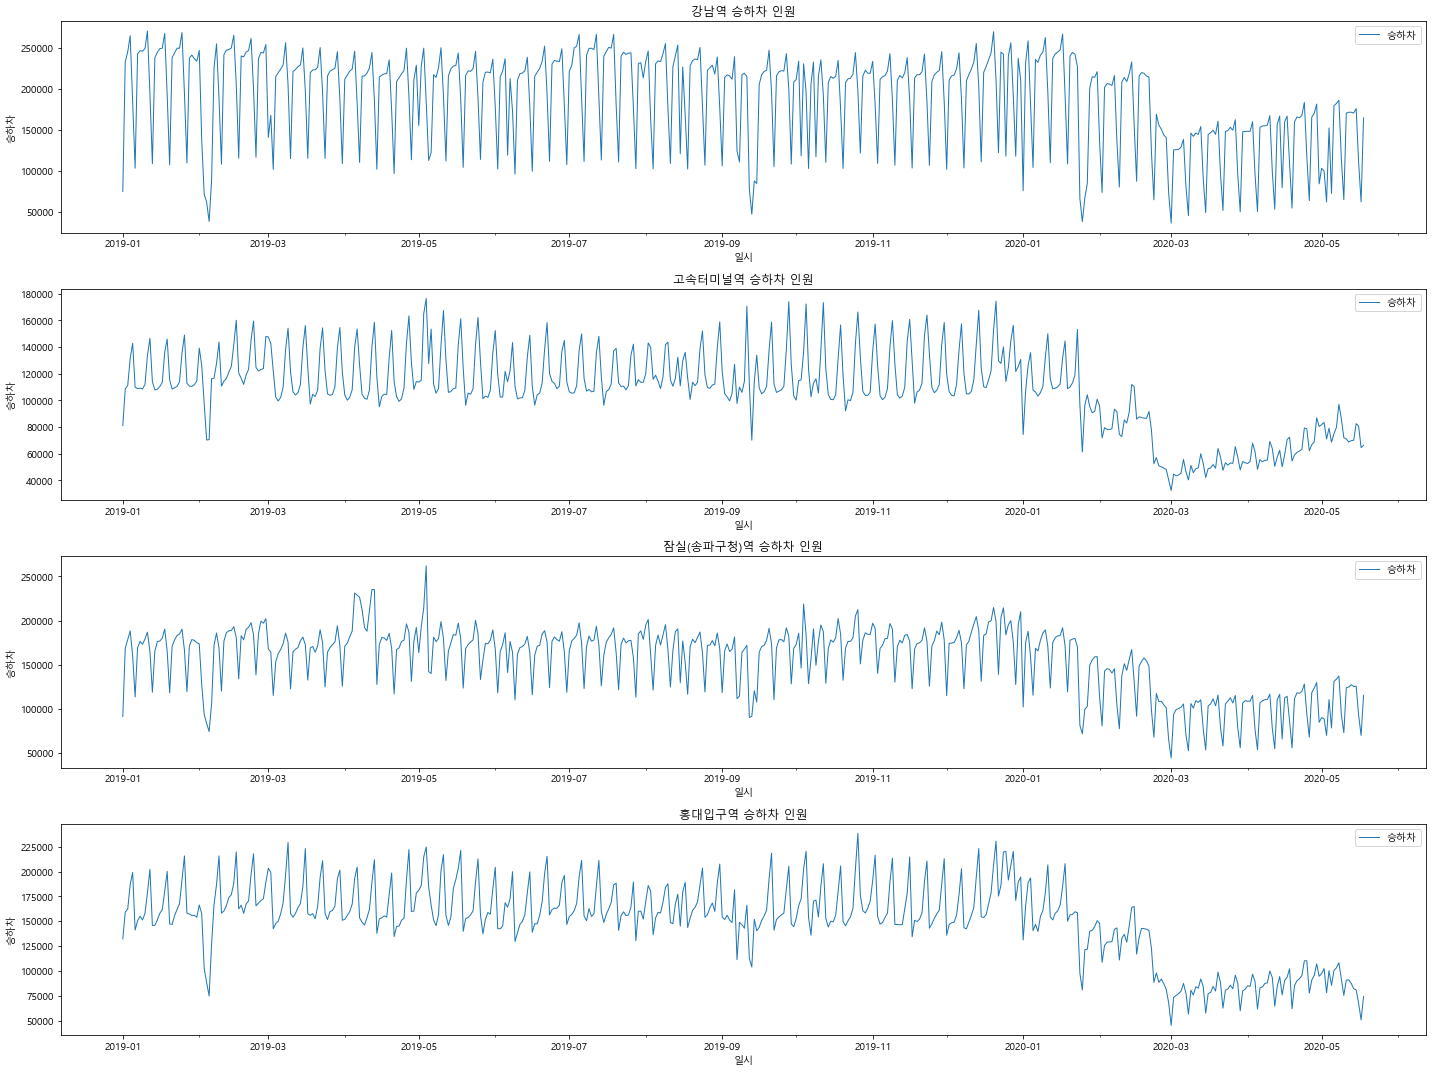

In [39]:
fig, axes = plt.subplots(4,1,figsize=(20,15))
axes[0].plot(weather_add_covid.loc[0:503,['일시']], weather_add_covid.loc[0:503,['승하차인원']], label='승하차', lw=1)
axes[0].set_xlabel('일시')
axes[0].set_ylabel('승하차')
axes[0].set_title('강남역 승하차 인원')
axes[0].xaxis.set_minor_locator(md.MonthLocator())
axes[0].legend()
axes[1].plot(weather_add_covid.loc[504:1007,['일시']], weather_add_covid.loc[504:1007,['승하차인원']], label='승하차', lw=1)
axes[1].set_xlabel('일시')
axes[1].set_ylabel('승하차')
axes[1].set_title('고속터미널역 승하차 인원')
axes[1].xaxis.set_minor_locator(md.MonthLocator())
axes[1].legend()
axes[2].plot(weather_add_covid.loc[1008:1511,['일시']], weather_add_covid.loc[1008:1511,['승하차인원']], label='승하차', lw=1)
axes[2].set_xlabel('일시')
axes[2].set_ylabel('승하차')
axes[2].set_title('잠실(송파구청)역 승하차 인원')
axes[2].xaxis.set_minor_locator(md.MonthLocator())
axes[2].legend()
axes[3].plot(weather_add_covid.loc[1512:2015,['일시']], weather_add_covid.loc[1512:2015,['승하차인원']], label='승하차', lw=1)
axes[3].set_xlabel('일시')
axes[3].set_ylabel('승하차')
axes[3].set_title('홍대입구역 승하차 인원')
axes[3].xaxis.set_minor_locator(md.MonthLocator())
axes[3].legend()
plt.tight_layout()
plt.savefig('metro_3.png')
plt.show()

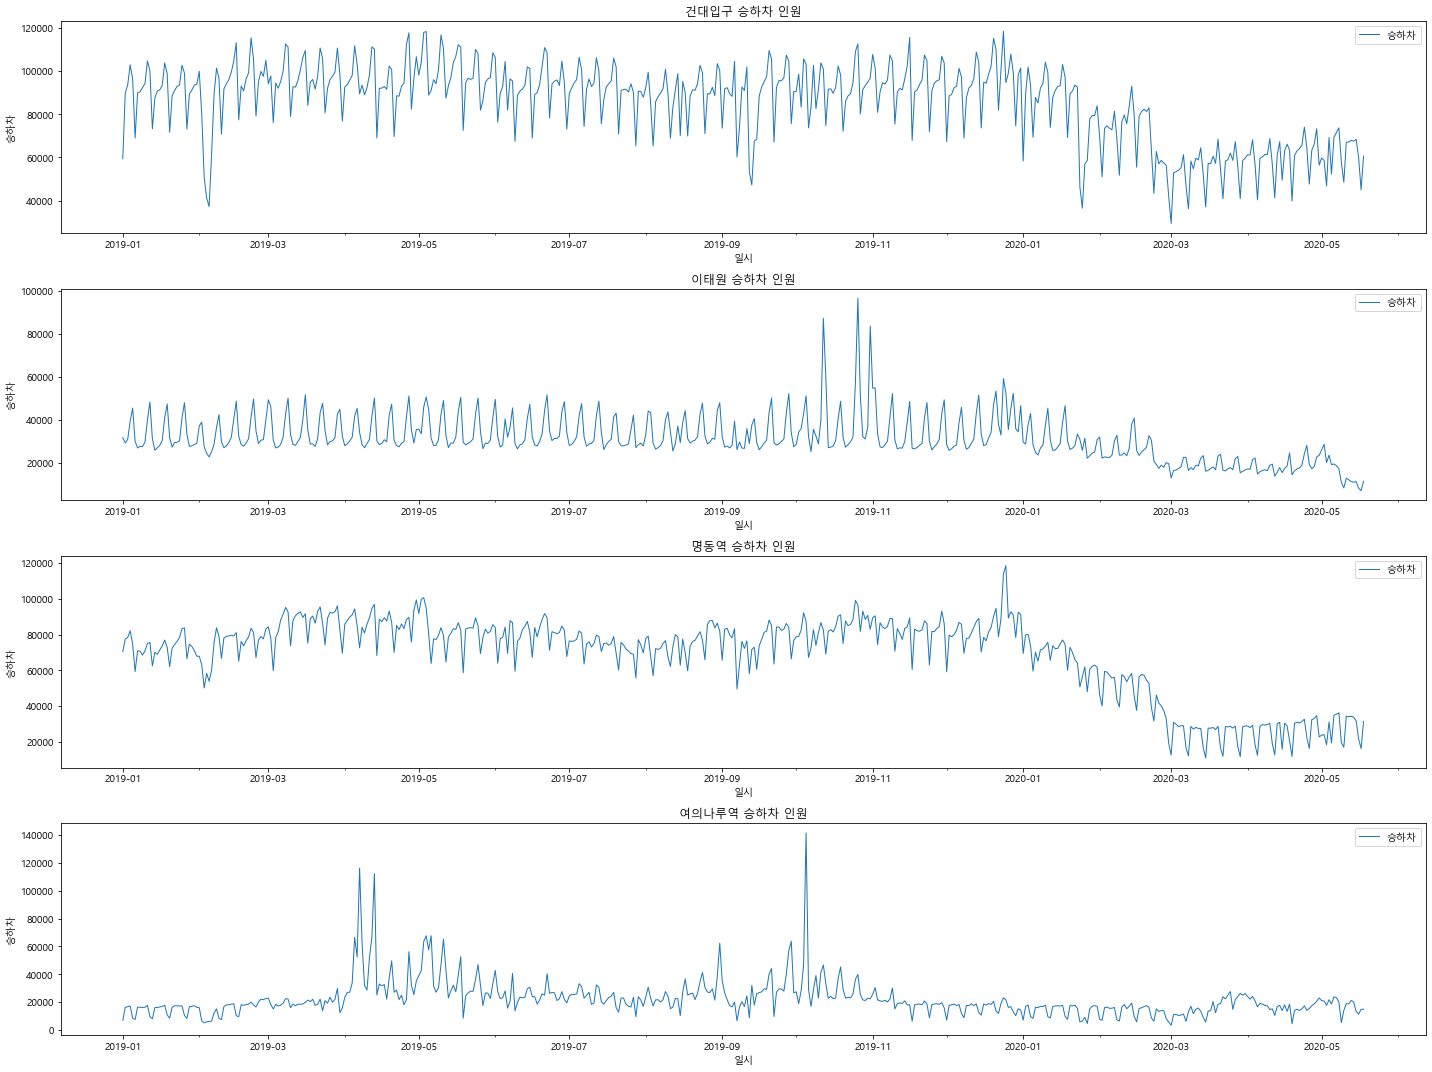

In [38]:
fig, axes = plt.subplots(4,1,figsize=(20,15))
axes[0].plot(weather_add_covid.loc[2016:2519,['일시']], weather_add_covid.loc[2016:2519,['승하차인원']], label='승하차', lw=1)
axes[0].set_xlabel('일시')
axes[0].set_ylabel('승하차')
axes[0].set_title('건대입구 승하차 인원')
axes[0].xaxis.set_minor_locator(md.MonthLocator())
axes[0].legend()
axes[1].plot(weather_add_covid.loc[2520:3023,['일시']], weather_add_covid.loc[2520:3023,['승하차인원']], label='승하차', lw=1)
axes[1].set_xlabel('일시')
axes[1].set_ylabel('승하차')
axes[1].set_title('이태원 승하차 인원')
axes[1].xaxis.set_minor_locator(md.MonthLocator())
axes[1].legend()
axes[2].plot(weather_add_covid.loc[3024:3527,['일시']], weather_add_covid.loc[3024:3527,['승하차인원']], label='승하차', lw=1)
axes[2].set_xlabel('일시')
axes[2].set_ylabel('승하차')
axes[2].set_title('명동역 승하차 인원')
axes[2].xaxis.set_minor_locator(md.MonthLocator())
axes[2].legend()
axes[3].plot(weather_add_covid.loc[3528:4031,['일시']], weather_add_covid.loc[3528:4031,['승하차인원']], label='승하차', lw=1)
axes[3].set_xlabel('일시')
axes[3].set_ylabel('승하차')
axes[3].set_title('여의나루역 승하차 인원')
axes[3].xaxis.set_minor_locator(md.MonthLocator())
axes[3].legend()
plt.tight_layout()
plt.savefig('metro_4.png')
plt.show()

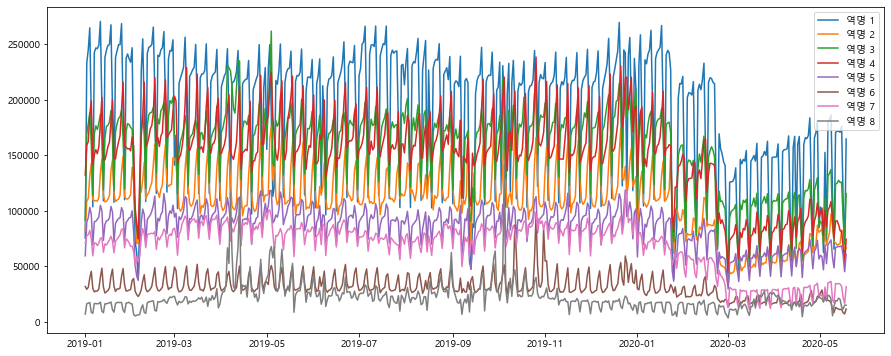

In [45]:
plt.figure(figsize=(15, 6))
for i in weather_add_covid.역명.unique():
    plt.plot(weather_add_covid[weather_add_covid.역명 == i].일시, weather_add_covid[weather_add_covid.역명 == i].승하차인원, label='역명 {}'.format(i))
plt.legend()
plt.savefig('metro_6.png')

In [60]:
def corr_graph(data_frame, subway_num, idx_col, y_cols):
    df_set = data_frame[data_frame.역명 == subway_num]
    
    fig, ax1 = plt.subplots(figsize=(15, 3))
    ax1.set_xlabel("{}".format(idx_col))
    ax1.set_ylabel("{}".format(y_cols[0])).set_color(color='tab:blue')
    ax1.plot(df_set.iloc[:,0], df_set[y_cols[0]].values, color='tab:blue')
    
    for i in range(1, len(y_cols)):
        ax2 = ax1.twinx()
        ax2.set_ylabel("{}".format(y_cols[i])).set_color(color='C{}'.format(i))
        ax2.plot(df_set.iloc[:,0], df_set[y_cols[i]].values, color='C{}'.format(i))
        ax2.spines['right'].set_position(('outward', (60*(i-1))))

    fig.tight_layout()
    plt.show()

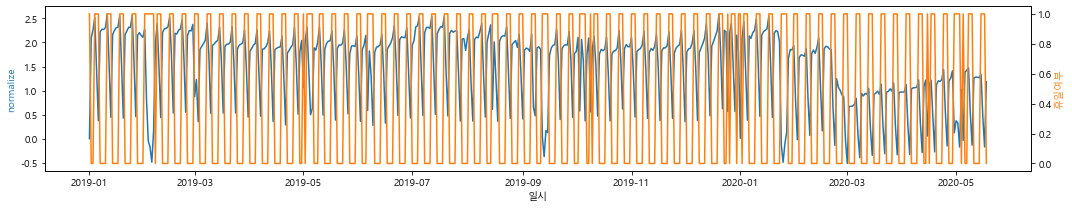

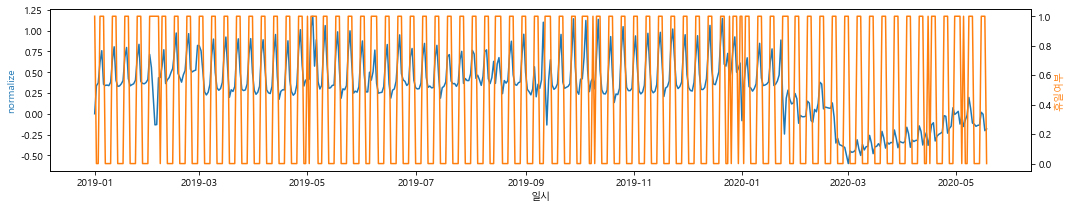

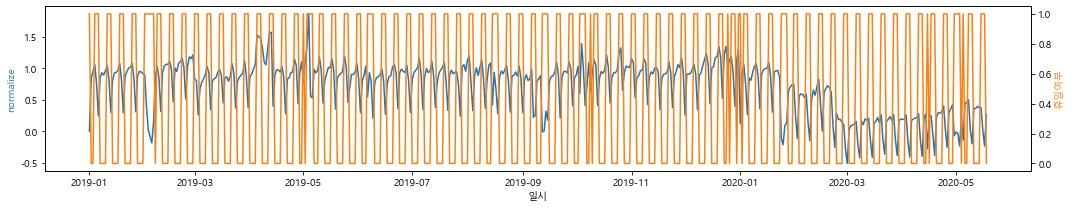

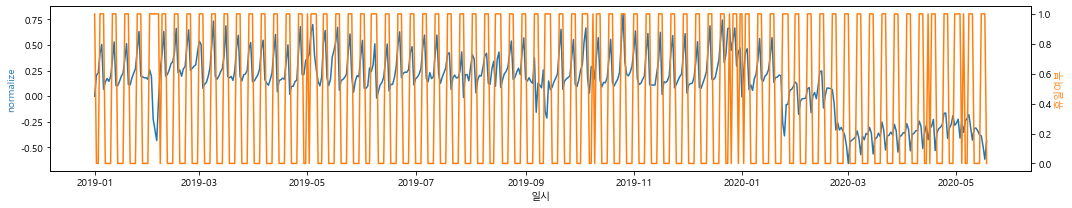

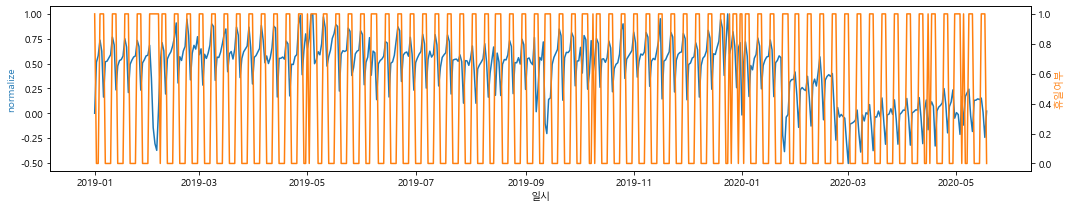

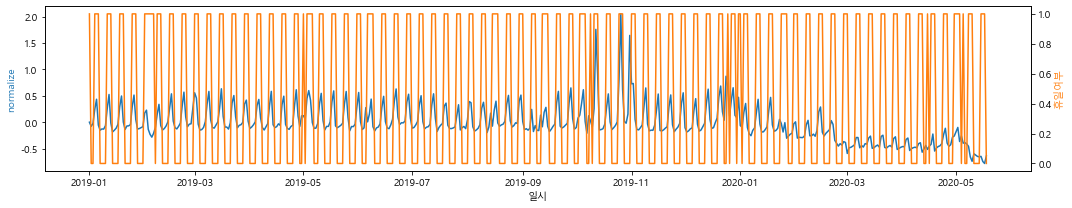

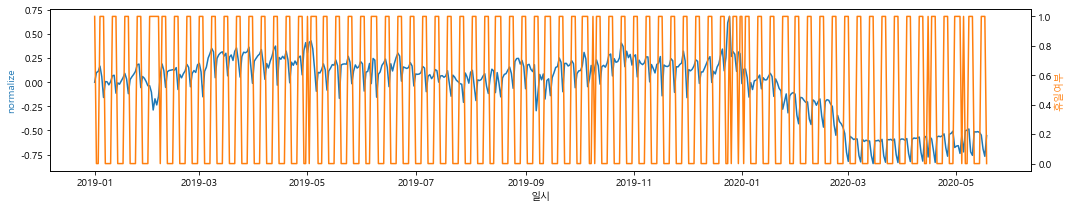

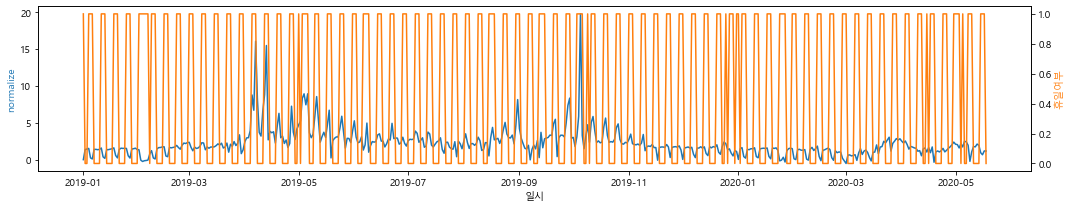

In [92]:
for i in weather_add_covid_norm.역명.unique():
    corr_graph(weather_add_covid_norm, i, '일시', ['normalize', '휴일여부'])


In [19]:
#승하차인원 정규화
import numpy as np
weather_add_covid_norm = weather_add_covid.copy()

normalized_arr = np.array([])
for i in weather_add_covid_norm.역명.unique():
    df_set = weather_add_covid_norm[weather_add_covid_norm.역명 == i].승하차인원.values
    set_arr = np.array([(float(i + 1) / float(df_set[0] + 1))-1 for i in df_set])
    normalized_arr = np.concatenate((normalized_arr, set_arr))

weather_add_covid_norm.insert(9, 'normalize', normalized_arr)

In [20]:
weather_add_covid_norm

,일시,평균기온(°C),일강수량(mm),평균 풍속(m/s),노선명,역명,승하차인원,휴일여부,confirmed,normalize
0,2019-01-01,-3.7,0.0,1.8,2호선,1,75273,1,0.0,0.000000
1,2019-01-02,-3.5,0.0,1.5,2호선,1,233032,0,0.0,2.095797
2,2019-01-03,-1.9,0.0,1.1,2호선,1,245143,0,0.0,2.256689
3,2019-01-04,-0.5,0.0,1.3,2호선,1,264826,1,0.0,2.518174
4,2019-01-05,-1.5,0.0,2.0,2호선,1,185844,1,0.0,1.468914
...,...,...,...,...,...,...,...,...,...,...
4027,2020-05-14,20.9,0.0,0.4,5호선,8,19958,0,29.0,1.931267
4028,2020-05-15,16.9,9.0,0.8,5호선,8,13201,1,27.0,0.938904
4029,2020-05-16,17.0,1.5,0.6,5호선,8,11312,1,19.0,0.661477
4030,2020-05-17,19.2,0.0,0.7,5호선,8,14847,1,13.0,1.180643


In [21]:
df_set = weather_add_covid_norm[weather_add_covid_norm.역명 == 1]

dl_x = df_set.iloc[:,0].values
dl_y = df_set.normalize

size = int(len(df_set) * 0.7)
x_train = dl_x[:size]
y_train = dl_y[:size]
x_test = dl_x[size:]
y_test = dl_y[size:]

x_train = x_train.reshape(len(x_train), 1)
x_train = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))

x_test = x_test.reshape(len(x_test), 1)
x_test = np.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1]))

In [22]:
import tensorflow as tf
import keras
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential

model = Sequential()

model.add(LSTM
          (input_dim=1,        # 입력으로 들어가는 데이터의 차원에 맞게 설정
           output_dim =50,     # LSTM layer로 들어가는 입력값 설정
           input_shape=(len(dl_x), 1),
           return_sequences=True))
model.add(Dropout(0.2))        # overfitting을 방지하기 위한 Dropout 설정(20%)

model.add(LSTM(100,
              return_sequences=False)) # Dense layer에 들어가기 전이므로 False
model.add(Dropout(0.2))

model.add(Dense(output_dim=1))
model.add(Activation('relu')) # linear, relu, sigmoid, softmax
# normalize로 value가 작아졌기 때문에 mse로 진행
model.compile(loss='mean_squared_error', optimizer='adam')

# 모델 학습
model.fit(x_train, y_train, epochs=100, validation_split=0.05, verbose=0)

ImportError: cannot import name 'export_saved_model' from 'tensorflow.python.keras.saving.saved_model' (C:\anaconda3\lib\site-packages\tensorflow\python\keras\saving\saved_model\__init__.py)

In [23]:
weather_add_corr = weather_add_covid.set_index('일시')
weather_add_corr

,평균기온(°C),일강수량(mm),평균 풍속(m/s),노선명,역명,승하차인원,휴일여부,confirmed
일시,,,,,,,,
2019-01-01,-3.7,0.0,1.8,2호선,1,75273,1,0.0
2019-01-02,-3.5,0.0,1.5,2호선,1,233032,0,0.0
2019-01-03,-1.9,0.0,1.1,2호선,1,245143,0,0.0
2019-01-04,-0.5,0.0,1.3,2호선,1,264826,1,0.0
2019-01-05,-1.5,0.0,2.0,2호선,1,185844,1,0.0
...,...,...,...,...,...,...,...,...
2020-05-14,20.9,0.0,0.4,5호선,8,19958,0,29.0
2020-05-15,16.9,9.0,0.8,5호선,8,13201,1,27.0
2020-05-16,17.0,1.5,0.6,5호선,8,11312,1,19.0


In [88]:
#코로나 확진자와 승하차인원 -0.17, 역명과 승하차인원 -0.75
weather_add_corr.corr()

,평균기온(°C),일강수량(mm),평균 풍속(m/s),역명,승하차인원,휴일여부,confirmed
평균기온(°C),1.000000,0.184891,-0.123823,-1.490512e-02,0.046130,0.000236,-1.365748e-01
일강수량(mm),0.184891,1.000000,0.001004,-1.842441e-02,0.005778,-0.038677,-4.669387e-02
평균 풍속(m/s),-0.123823,0.001004,1.000000,-3.158901e-02,0.083108,-0.036253,3.481998e-02
역명,-0.014905,-0.018424,-0.031589,1.000000e+00,-0.756888,0.000000,-1.707052e-19
승하차인원,0.046130,0.005778,0.083108,-7.568876e-01,1.000000,-0.038144,-1.758779e-01
휴일여부,0.000236,-0.038677,-0.036253,0.000000e+00,-0.038144,1.000000,1.374147e-02
confirmed,-0.136575,-0.046694,0.034820,-1.707052e-19,-0.175878,0.013741,1.000000e+00


In [93]:
weather_add_corr_1=weather_add_covid[weather_add_covid['역명']>1]
weather_add_corr_1

,일시,평균기온(°C),일강수량(mm),평균 풍속(m/s),노선명,역명,승하차인원,휴일여부,confirmed
504,2019-01-01,-4.2,0.0,1.5,3호선,2,81143,1,0.0
505,2019-01-02,-4.2,0.0,1.5,3호선,2,108547,0,0.0
506,2019-01-03,-3.1,0.0,1.0,3호선,2,111173,0,0.0
507,2019-01-04,-0.8,0.0,1.1,3호선,2,131287,1,0.0
508,2019-01-05,-2.0,0.0,1.9,3호선,2,142740,1,0.0
509,2019-01-06,-2.5,0.0,1.1,3호선,2,109878,1,0.0
510,2019-01-07,-1.8,0.0,1.3,3호선,2,108767,0,0.0
511,2019-01-08,-2.3,0.0,2.6,3호선,2,109168,0,0.0
512,2019-01-09,-3.6,0.0,1.3,3호선,2,108592,0,0.0
513,2019-01-10,0.3,0.0,1.2,3호선,2,111907,0,0.0


In [95]:
weather_add_corr_1.set_index('일시', inplace=True)

In [99]:
weather_add_corr_1.corr()

,평균기온(°C),일강수량(mm),평균 풍속(m/s),역명,승하차인원,휴일여부,confirmed
평균기온(°C),1.000000,0.184554,-0.117494,-1.289694e-02,0.051933,6.181875e-04,-1.369821e-01
일강수량(mm),0.184554,1.000000,0.013546,-1.270749e-02,-0.008586,-4.053970e-02,-4.678952e-02
평균 풍속(m/s),-0.117494,0.013546,1.000000,-1.321973e-01,0.193480,-3.370073e-02,3.407952e-02
역명,-0.012897,-0.012707,-0.132197,1.000000e+00,-0.707998,-1.261980e-18,5.211209e-18
승하차인원,0.051933,-0.008586,0.193480,-7.079982e-01,1.000000,2.192985e-02,-1.885486e-01
휴일여부,0.000618,-0.040540,-0.033701,-1.261980e-18,0.021930,1.000000e+00,1.374147e-02
confirmed,-0.136982,-0.046790,0.034080,5.211209e-18,-0.188549,1.374147e-02,1.000000e+00


In [25]:
import numpy as np

In [28]:
log_y_data = np.log1p(np.array(weather_add_corr,dtype=np.float32))
log_y_data

ValueError: could not convert string to float: '2호선'